### Introduction To Decision Tree

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

1. At the beginning, the whole training set is considered as the root.
2. Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
3. Records are distributed recursively on the basis of attribute values.
4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.


### Classification and Regression Trees (CART)
Decision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees. Classification and Regression Trees or CART is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.

The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees.

### Decision Tree algorithm terminology
In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-

* Root Node: The initial node at the beginning of a decision tree, where the entire population or dataset starts dividing based on various features or conditions.
* Decision Nodes: Nodes resulting from the splitting of root nodes are known as decision nodes. These nodes represent intermediate decisions or conditions within the tree.
* Leaf Nodes: Nodes where further splitting is not possible, often indicating the final classification or outcome. Leaf nodes are also referred to as terminal nodes.
* Sub-Tree: Similar to a subsection of a graph being called a sub-graph, a sub-section of a decision tree is referred to as a sub-tree. It represents a specific portion of the decision tree.
* Pruning: The process of removing or cutting down specific nodes in a decision tree to prevent overfitting and simplify the model.
* Branch / Sub-Tree: A subsection of the entire decision tree is referred to as a branch or sub-tree. It represents a specific path of decisions and outcomes within the tree.
* Parent and Child Node: In a decision tree, a node that is divided into sub-nodes is known as a parent node, and the sub-nodes emerging from it are referred to as child nodes. The parent node represents a decision or condition, while the child nodes represent the potential outcomes or further decisions based on that condition.
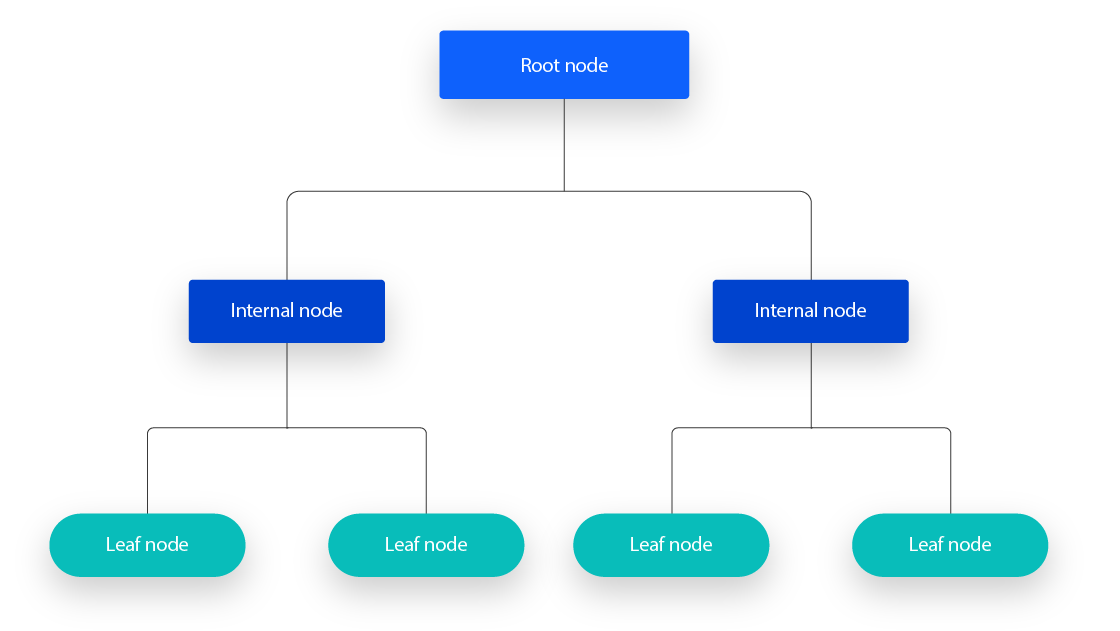

### How decision tree algorithms work?
Decision Tree algorithm works in simpler steps

1. Starting at the Root: The algorithm begins at the top, called the “root node,” representing the entire dataset.
2. Asking the Best Questions: It looks for the most important feature or question that splits the data into the most distinct groups. This is like asking a question at a fork in the tree.
3. Branching Out: Based on the answer to that question, it divides the data into smaller subsets, creating new branches. Each branch represents a possible route through the tree.
4. Repeating the Process: The algorithm continues asking questions and splitting the data at each branch until it reaches the final “leaf nodes,” representing the predicted outcomes or classifications.

### How do Decision Trees use Entropy?
Now we know what entropy is and what is its formula, Next, we need to know that how exactly does it work in this algorithm.

Entropy basically measures the impurity of a node. Impurity is the degree of randomness; it tells how random our data is. A pure sub-split means that either you should be getting “yes”, or you should be getting “no”.

Suppose a feature has 8 “yes” and 4 “no” initially, after the first split the left node gets 5 ‘yes’ and 2 ‘no’ whereas right node gets 3 ‘yes’ and 2 ‘no’.

We see here the split is not pure, why? Because we can still see some negative classes in both the nodes. In order to make a decision tree, we need to calculate the impurity of each split, and when the purity is 100%, we make it as a leaf node.

To check the impurity of feature 2 and feature 3 we will take the help for Entropy formula.

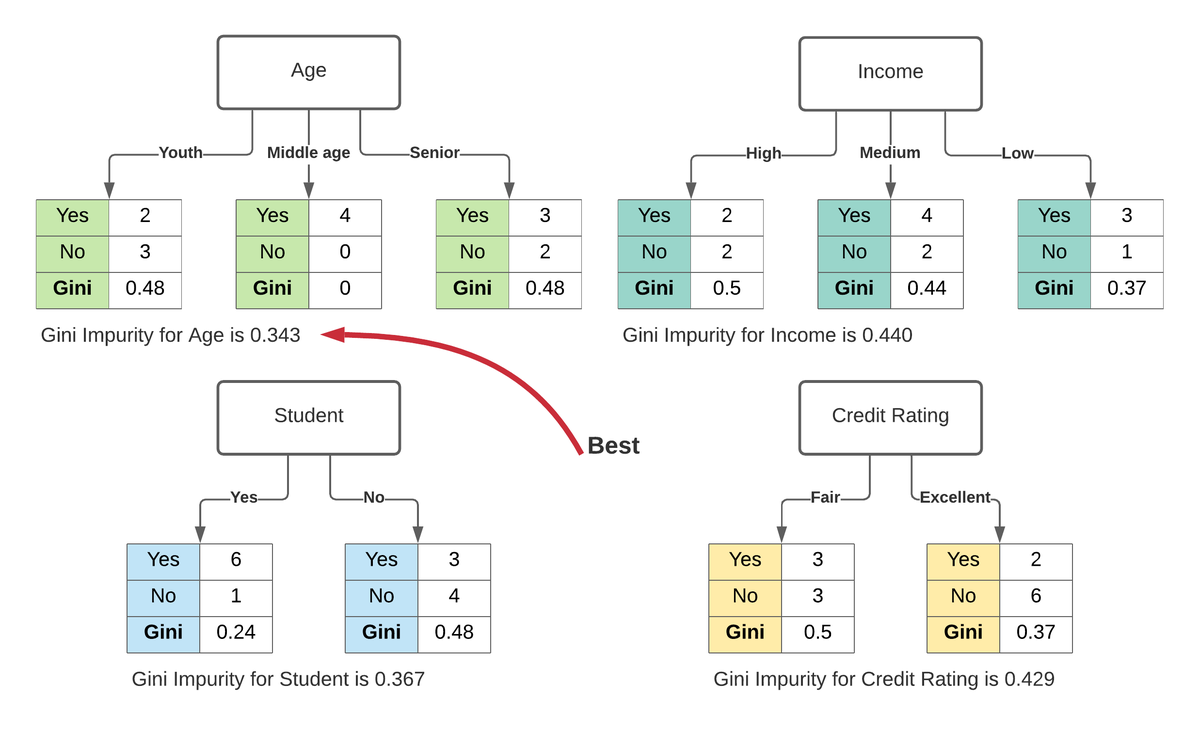



We can clearly see from the tree itself that left node has low entropy or more purity than right node since left node has a greater number of “yes” and it is easy to decide here.

Always remember that the higher the Entropy, the lower will be the purity and the higher will be the impurity.

### Overfitting in Decision Tree algorithm
Overfitting is a practical problem while building a Decision-Tree model. The problem of overfitting is considered when the algorithm continues to go deeper and deeper to reduce the training-set error but results with an increased test-set error. So, accuracy of prediction for our model goes down. It generally happens when we build many branches due to outliers and irregularities in data.

Two approaches which can be used to avoid overfitting are as follows:-

* Pre-Pruning

* Post-Pruning

**Pre-Pruning**  
In pre-pruning, we stop the tree construction a bit early. We prefer not to split a node if its goodness measure is below a threshold value. But it is difficult to choose an appropriate stopping point.

**Post-Pruning**  
In post-pruning, we go deeper and deeper in the tree to build a complete tree. If the tree shows the overfitting problem then pruning is done as a post-pruning step. We use the cross-validation data to check the effect of our pruning. Using cross-validation data, we test whether expanding a node will result in improve or not. If it shows an improvement, then we can continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded. So, the node should be converted to a leaf node.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('HR_file.csv')
dataset

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2,157,3,0,1,0,sales,low,31
1,0.80,0.86,5,262,6,0,1,0,sales,medium,71
2,0.11,0.88,7,272,4,0,1,0,sales,medium,8
3,0.72,0.87,5,223,5,0,1,0,sales,low,68
4,0.37,0.52,2,159,3,0,1,0,sales,low,48
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,49
14995,0.37,0.48,2,160,3,0,1,0,support,low,3
14996,0.37,0.53,2,143,3,0,1,0,support,low,5
14997,0.11,0.96,6,280,4,0,1,0,support,low,78


In [3]:
dataset.shape

(14999, 11)

In [4]:
dataset.describe(include="all")

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999,14999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN,11.706780
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN,25.300786
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         14999 non-null  float64
 1   Last Evaluation            14999 non-null  float64
 2   Number of Projects         14999 non-null  int64  
 3   Monthly Hours              14999 non-null  int64  
 4   Total Time at the Company  14999 non-null  int64  
 5   Work Accidents             14999 non-null  int64  
 6   Quit the Company           14999 non-null  int64  
 7   Promoted in Last 5 yrs     14999 non-null  int64  
 8   Departments                14999 non-null  object 
 9   salary                     14999 non-null  object 
 10  Management                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


### Data Preprocessing

In [6]:
print("No of duplicate records - ",dataset.duplicated().sum())
print("% of Duplicate records - " , dataset.duplicated().sum()/len(dataset)*100)

No of duplicate records -  1463
% of Duplicate records -  9.753983598906593


In [7]:
dataset.drop_duplicates(inplace=True,keep="first")
dataset.shape

(13536, 11)

In [8]:
dataset.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Work Accidents',
       'Quit the Company', 'Promoted in Last 5 yrs', 'Departments ', 'salary',
       'Management'],
      dtype='object')

In [9]:
#### Dropping off the Work Accidents as well as the Management column
dataset.drop(['Work Accidents','Management'],axis=1,inplace=True)

In [10]:
dataset.isnull().sum()

Satisfaction Level           0
Last Evaluation              0
Number of Projects           0
Monthly Hours                0
Total Time at the Company    0
Quit the Company             0
Promoted in Last 5 yrs       0
Departments                  0
salary                       0
dtype: int64

In [11]:
for i in dataset.columns:
    print({i:dataset[i].unique()})

{'Satisfaction Level': array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])}
{'Last Evaluation': array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63,

In [12]:
dataset.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Quit the Company',
       'Promoted in Last 5 yrs', 'Departments ', 'salary'],
      dtype='object')

In [13]:
dataset['Total Time at the Company'].value_counts()

Total Time at the Company
3     5885
2     2931
4     2392
5     1405
6      641
10     107
7       94
8       81
Name: count, dtype: int64

In [14]:
import seaborn as sns

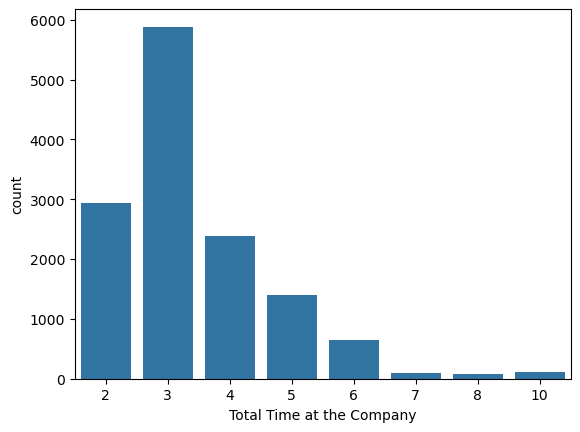

In [15]:
sns.countplot(data=dataset,x=dataset['Total Time at the Company']);

From the above analysis we can derive that most the employees have decidated 3yrs into the organization

In [16]:
dataset.groupby(['Departments ','Quit the Company'])["Departments "].count()/len(dataset)*100

Departments   Quit the Company
IT            0                    6.043144
              1                    1.987293
RandD         0                    4.499113
              1                    0.893913
accounting    0                    3.782506
              1                    1.499704
hr            0                    3.605201
              1                    1.580969
management    0                    2.836879
              1                    0.664894
marketing     0                    4.144504
              1                    1.470154
product_mng   0                    4.255319
              1                    1.455378
sales         0                   19.865544
              1                    7.402482
support       0                   11.148050
              1                    4.048463
technical     0                   13.696809
              1                    5.119681
Name: Departments , dtype: float64

The Quiting ratio seems to high in the Sales Department as compared to rest of the Departments

In [17]:
dataset.groupby(['salary','Quit the Company'])['Satisfaction Level'].count()/len(dataset)*100

salary  Quit the Company
high    0                    6.959220
        1                    0.605792
low     0                   33.732270
        1                   15.846631
medium  0                   33.185579
        1                    9.670508
Name: Satisfaction Level, dtype: float64

The Quiting ratio is very low is the High Salary bracket whereas the Quiting ratio is more in the Low salary bracket.

In [18]:
import matplotlib.pyplot as plt

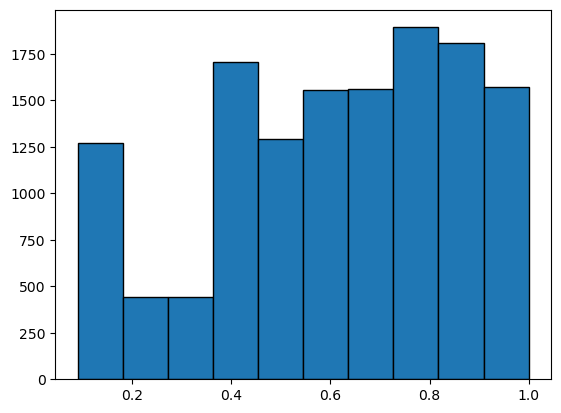

In [19]:
plt.hist(x=dataset['Satisfaction Level'],bins=10,edgecolor="black");

In [20]:
import warnings
warnings.filterwarnings('ignore')

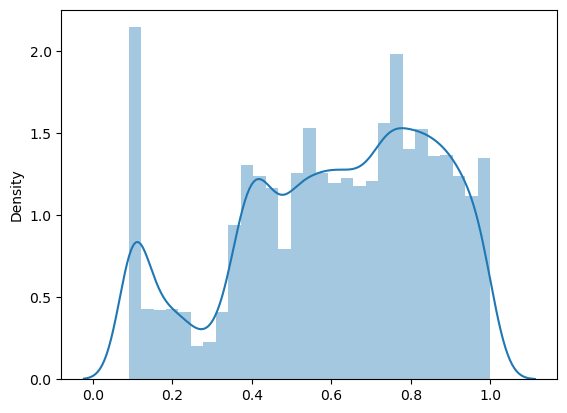

In [21]:
sns.distplot(x=dataset['Satisfaction Level']);

In [22]:
dataset.groupby(['Total Time at the Company','Quit the Company'])["Total Time at the Company"].count()/len(dataset)*100

Total Time at the Company  Quit the Company
2                          0                   21.269208
                           1                    0.384161
3                          0                   31.885343
                           1                   11.591312
4                          0                   11.155437
                           1                    6.515957
5                          0                    4.284870
                           1                    6.094858
6                          0                    3.198877
                           1                    1.536643
7                          0                    0.694444
8                          0                    0.598404
10                         0                    0.790485
Name: Total Time at the Company, dtype: float64

In [23]:
dataset.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Quit the Company',
       'Promoted in Last 5 yrs', 'Departments ', 'salary'],
      dtype='object')

In [24]:
pd.crosstab(index=dataset['Promoted in Last 5 yrs'],columns=dataset['Quit the Company'])/len(dataset)*100

Quit the Company,0,1
Promoted in Last 5 yrs,,
0,72.436466,25.982565
1,1.440603,0.140366


In [25]:
from sklearn.preprocessing import LabelEncoder
le_dept = LabelEncoder()

dataset['Departments '] = le_dept.fit_transform(dataset['Departments '])
le_name_mapping = dict(zip(le_dept.classes_, le_dept.transform(le_dept.classes_)))

print('mapping', le_name_mapping)

mapping {'IT': np.int64(0), 'RandD': np.int64(1), 'accounting': np.int64(2), 'hr': np.int64(3), 'management': np.int64(4), 'marketing': np.int64(5), 'product_mng': np.int64(6), 'sales': np.int64(7), 'support': np.int64(8), 'technical': np.int64(9)}


In [26]:
le_sal = LabelEncoder()

dataset['salary']  = le_sal.fit_transform(dataset['salary'])
le_name_mapping = dict(zip(le_sal.classes_, le_sal.transform(le_sal.classes_)))

print('mapping', le_name_mapping)

mapping {'high': np.int64(0), 'low': np.int64(1), 'medium': np.int64(2)}


In [27]:
dataset

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Quit the Company,Promoted in Last 5 yrs,Departments,salary
0,0.38,0.53,2,157,3,1,0,7,1
1,0.80,0.86,5,262,6,1,0,7,2
2,0.11,0.88,7,272,4,1,0,7,2
3,0.72,0.87,5,223,5,1,0,7,1
4,0.37,0.52,2,159,3,1,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,1,0,8,1
14995,0.37,0.48,2,160,3,1,0,8,1
14996,0.37,0.53,2,143,3,1,0,8,1
14997,0.11,0.96,6,280,4,1,0,8,1


In [28]:
dataset.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Quit the Company',
       'Promoted in Last 5 yrs', 'Departments ', 'salary'],
      dtype='object')

In [29]:
dataset['Quit the Company'].value_counts()

Quit the Company
0    10000
1     3536
Name: count, dtype: int64

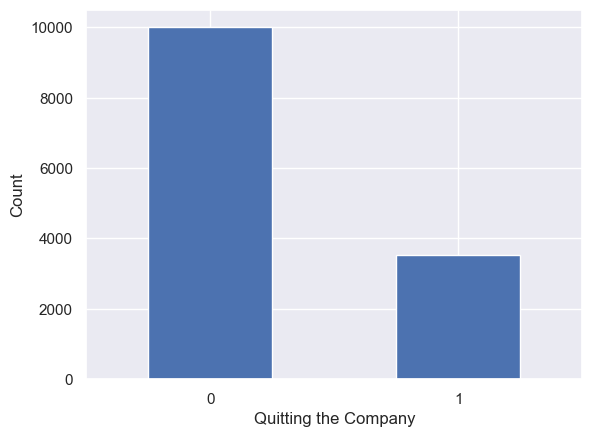

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
Quit_plot=dataset['Quit the Company'].value_counts().plot(kind='bar')
plt.xlabel('Quitting the Company')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

In [31]:
dataset.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Quit the Company',
       'Promoted in Last 5 yrs', 'Departments ', 'salary'],
      dtype='object')

In [32]:
x_features = ['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company','Promoted in Last 5 yrs', 'Departments ', 'salary']

In [33]:
X = dataset.drop(['Quit the Company'],axis=1)
Y = dataset['Quit the Company']

In [34]:
print(X.shape)
print(Y.shape)

(13536, 8)
(13536,)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [36]:
#Split the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)

In [37]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(9475, 8)
(9475,)
(4061, 8)
(4061,)


In [38]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 1 0 0]


In [39]:
classifier.predict_proba(X_test)

array([[0.65305552, 0.34694448],
       [0.64583318, 0.35416682],
       [0.81143991, 0.18856009],
       ...,
       [0.34880309, 0.65119691],
       [0.94140591, 0.05859409],
       [0.88501643, 0.11498357]])

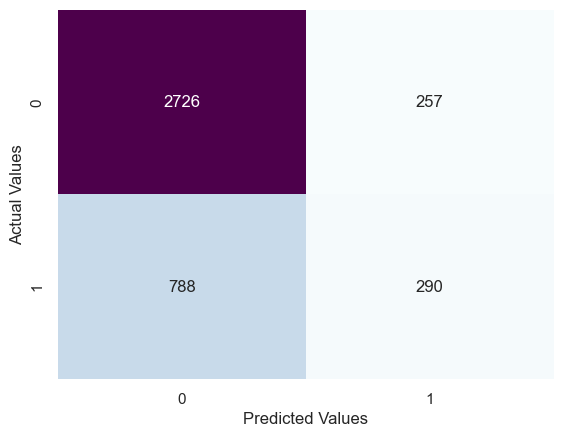

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      2983
           1       0.53      0.27      0.36      1078

    accuracy                           0.74      4061
   macro avg       0.65      0.59      0.60      4061
weighted avg       0.71      0.74      0.71      4061

Accuracy of the model:  0.7426742181728638


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, Y_test)))

Training set score: 0.7424
Test set score: 0.7427


In [42]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

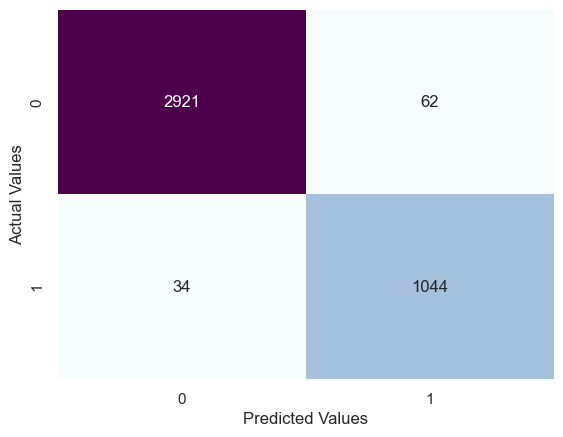

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2983
           1       0.94      0.97      0.96      1078

    accuracy                           0.98      4061
   macro avg       0.97      0.97      0.97      4061
weighted avg       0.98      0.98      0.98      4061

Accuracy of the model:  0.9763605023393253


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [44]:
model_DecisionTree.score(X_train,Y_train)

1.0

In [45]:
print(list(zip(dataset.columns[0:-1],model_DecisionTree.feature_importances_)))

[('Satisfaction Level', np.float64(0.5020450788567606)), ('Last Evaluation', np.float64(0.13937967463182027)), ('Number of Projects', np.float64(0.09961169414400382)), ('Monthly Hours', np.float64(0.08441491009422104)), ('Total Time at the Company', np.float64(0.15964134089679358)), ('Quit the Company', np.float64(3.4536591606896084e-05)), ('Promoted in Last 5 yrs', np.float64(0.011268432166441463)), ('Departments ', np.float64(0.0036043326183522826))]


In [46]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model_DecisionTree.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model_DecisionTree.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 0.9764


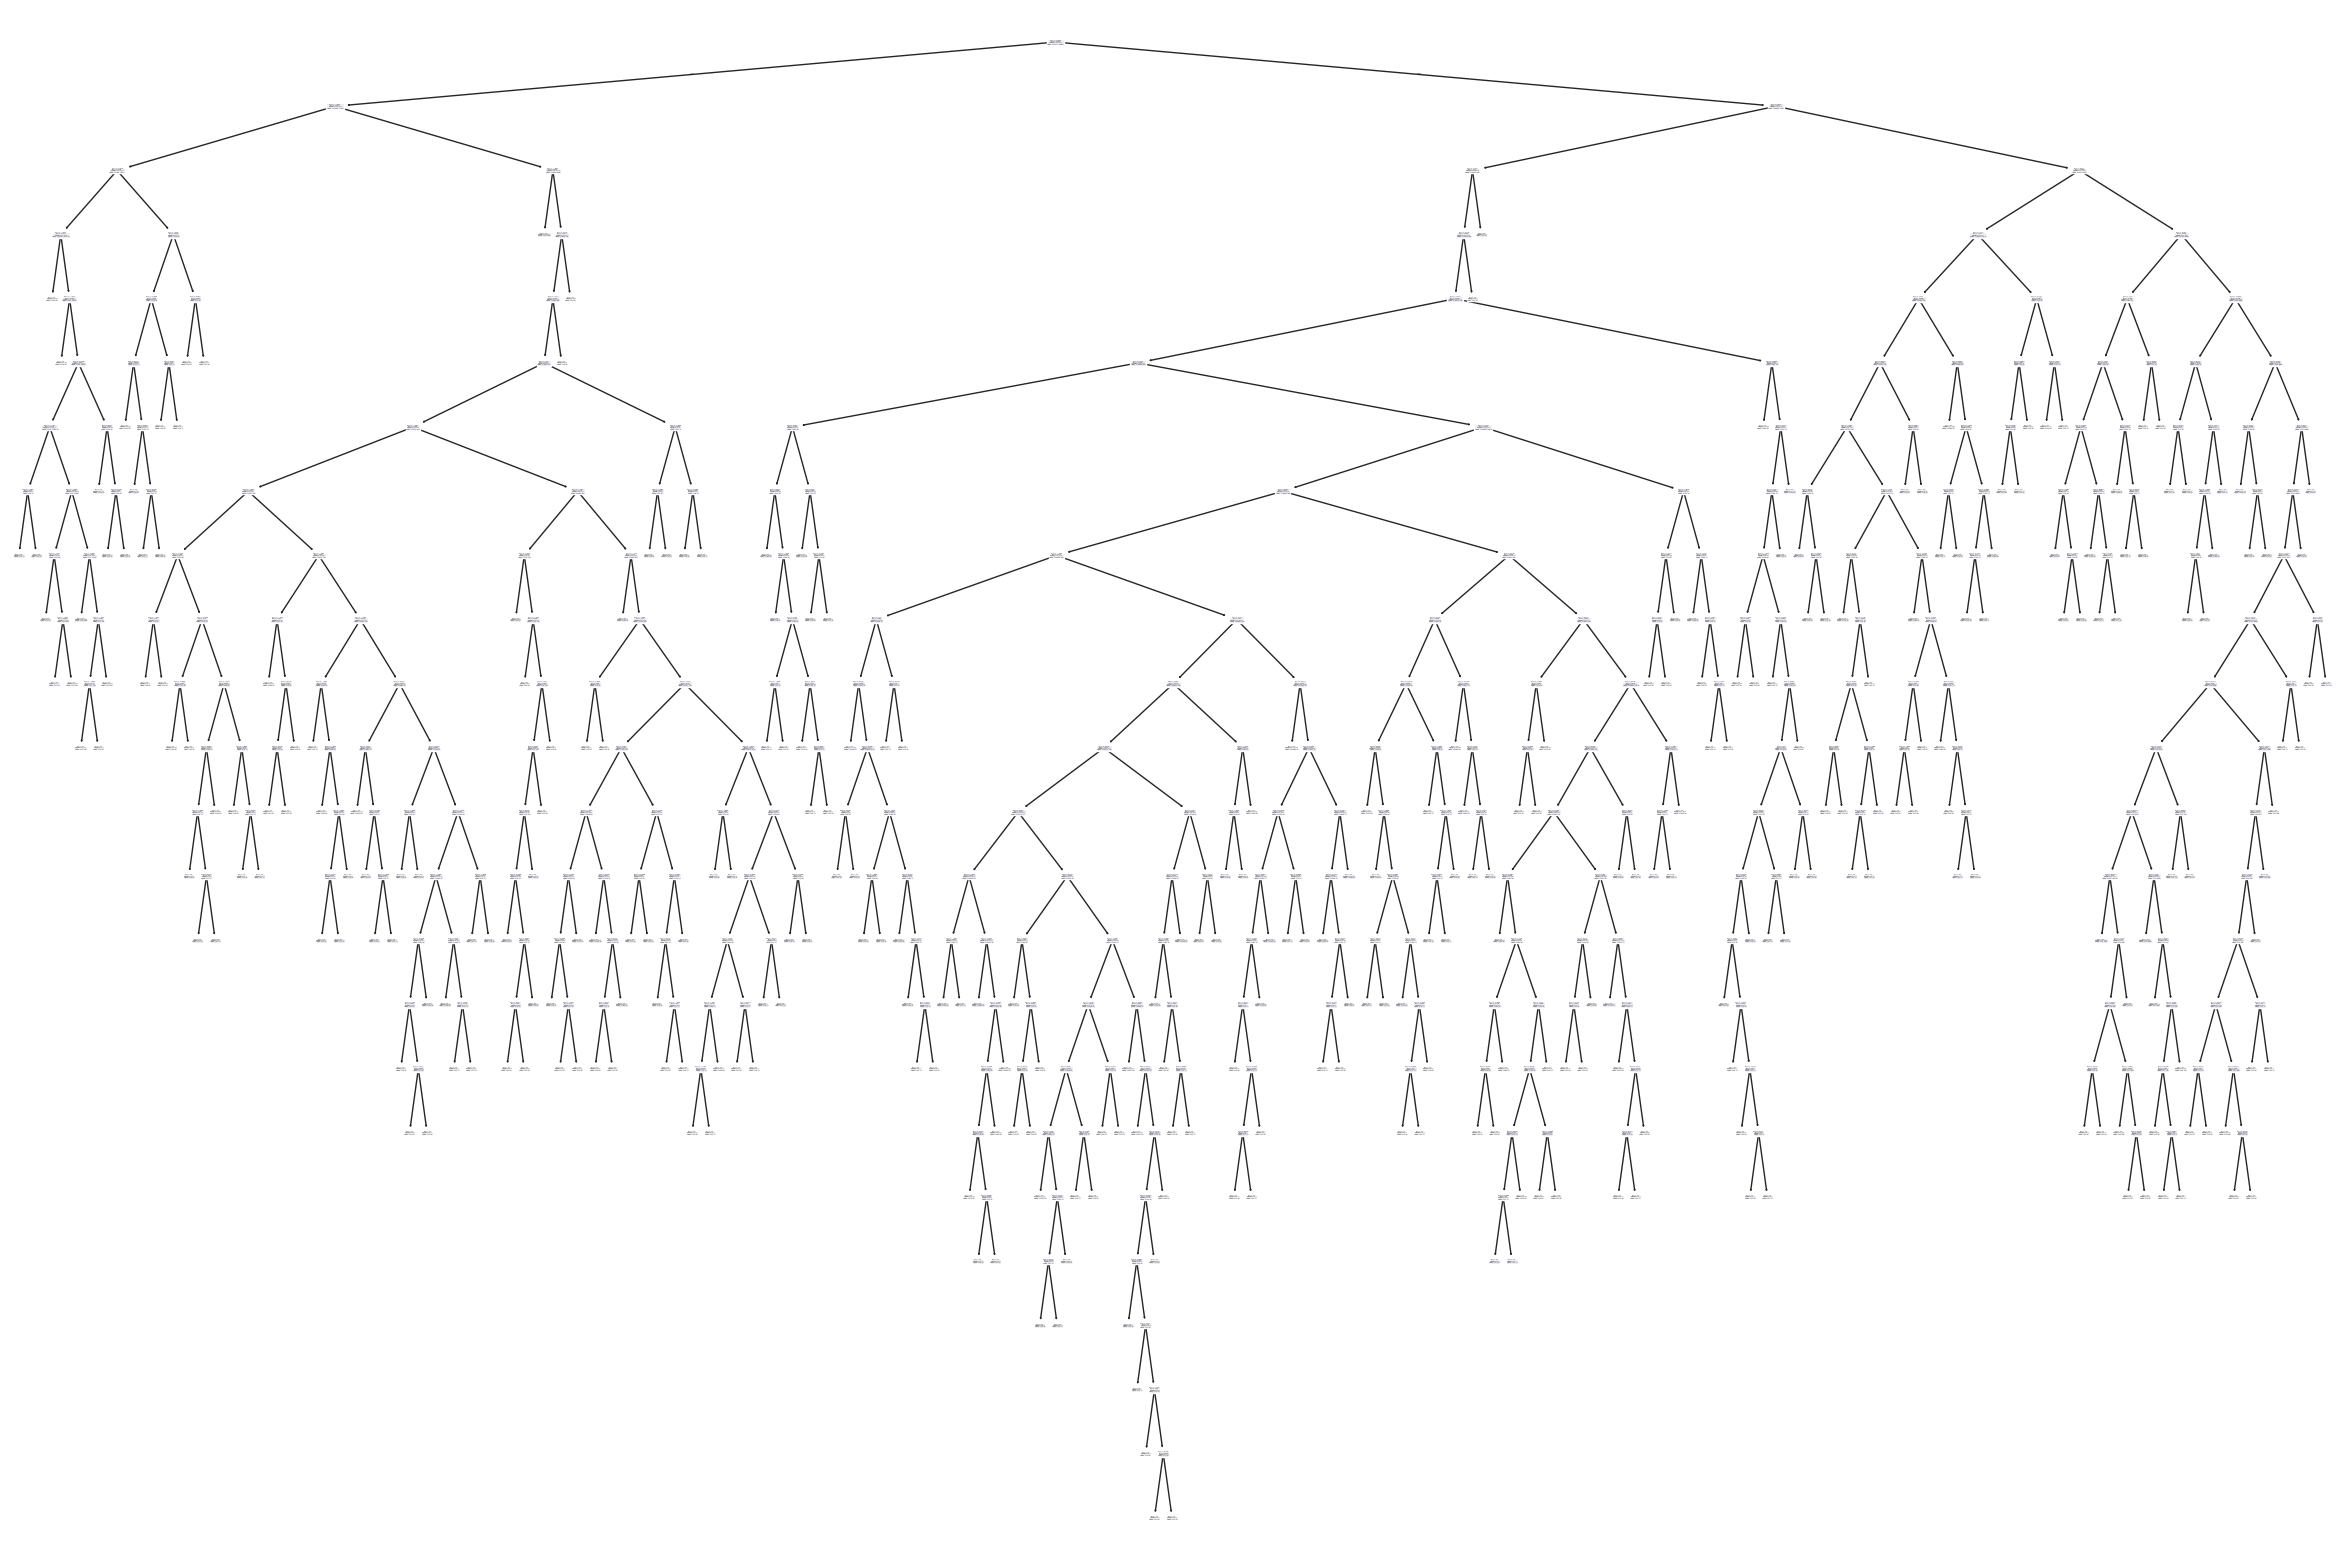

In [47]:
plt.figure(figsize=(30,20))

from sklearn import tree

tree.plot_tree(model_DecisionTree.fit(X_train, Y_train));

In [48]:
import joblib

joblib.dump({'dept': le_dept, 'salary': le_sal}, 'label_encoders.pkl')
joblib.dump(model_DecisionTree, 'model.pkl')

['model.pkl']

In [49]:
x_features

['Satisfaction Level',
 'Last Evaluation',
 'Number of Projects',
 'Monthly Hours',
 'Total Time at the Company',
 'Promoted in Last 5 yrs',
 'Departments ',
 'salary']

In [50]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
  Using cached gradio-6.3.0-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached audioop_lts-0.2.2-cp313-abi3-win_amd64.whl.metadata (2.0 kB)
  Using cached brotli-1.2.0-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached fastapi-0.128.0-py3-none-any.whl.metadata (30 kB)
  Using cached ffmpy-1.0.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached gradio_client-2.0.3-py3-none-any.whl.metadata (7.1 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached huggingface_hub-1.3.1-py3-none-any.whl.metadata (13 kB)
  Using cached orjson-3.11.5-cp313-cp313-win_amd64.whl.metadata (42 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.21-py3-none-any.whl.metadata (1.8 kB)
  Using cached safehttpx-0.1.7-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [51]:
import gradio as gr

model = joblib.load("model.pkl")
encoders = joblib.load("label_encoders.pkl")

def predict_hr_data(satisfaction_level, last_evaluation, number_projects,
                    montly_hours, time_spend_company,
                    promotion_last_5years, dept, salary):
    data = pd.DataFrame({
        'satisfaction_level': [satisfaction_level],
        'last_evaluation': [last_evaluation],
        'number_project': [number_projects],
        'average_montly_hours': [montly_hours],
        'time_spend_company': [time_spend_company],
        'promotion_last_5years': [promotion_last_5years],
        'dept': [dept],
        'salary': [salary]
    })

    for col in ['dept', 'salary']:
        le = encoders[col]
        data[col] = le.transform(data[col])

    prediction = model.predict(data)
    result = "Not Quitting the Company" if prediction[0] == 1 else "Quitting the Company"
    return result

inputs = [
    gr.Slider(0, 1, step=0.01, label="Satisfaction Level"),
    gr.Slider(0, 1, step=0.01, label="Last Evaluation"),
    gr.Slider(1, 10, step=1, label="Number of Projects"),
    gr.Slider(50, 350, step=10, label="Average Monthly Hours"),
    gr.Slider(1, 10, step=1, label="Time Spent in Company (Years)"),
    gr.Radio([0, 1], label="Promotion in Last 5 Years (0=No, 1=Yes)"),
    gr.Dropdown(encoders['dept'].classes_.tolist(), label="Department"),
    gr.Dropdown(encoders['salary'].classes_.tolist(), label="Salary Bracket")
]

output = gr.Textbox(label="Prediction Result")

app = gr.Interface(
    fn=predict_hr_data,
    inputs=inputs,
    outputs=output,
    title="HR Analytics Prediction App",
    description="Predict whether an employee is likely to leave based on HR data."
)


app.launch(inline=True)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
